In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import warnings 
import re
import string


In [2]:
train_data = pd.read_csv('train_tweets.csv')
test_data = pd.read_csv('test_tweets.csv')

In [3]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train_data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [5]:
train_data.shape

(31962, 3)

In [6]:
train_data.dtypes

id        int64
label     int64
tweet    object
dtype: object

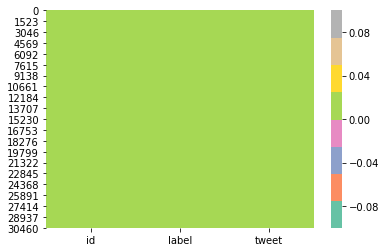

In [7]:
sns.heatmap(data = train_data.isnull(), cmap = 'Set2')

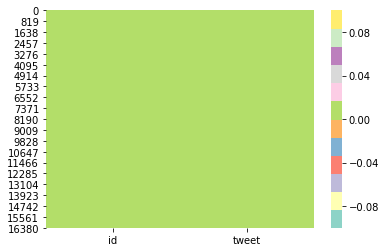

In [8]:
sns.heatmap(data = test_data.isnull(), cmap = 'Set3')

In [9]:
test_data.columns

Index(['id', 'tweet'], dtype='object')

In [10]:
test_data.shape

(17197, 2)

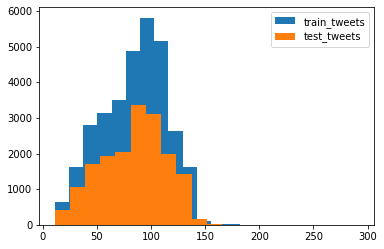

In [11]:
length_train = train_data['tweet'].str.len() 
length_test = test_data['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [12]:
combination = train_data.append(test_data, ignore_index = True)
combination.shape

/home/tobby/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(49159, 3)

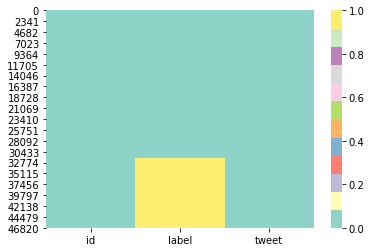

In [13]:
sns.heatmap(data =combination.isnull(), cmap = 'Set3')

In [14]:
combination['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

In [15]:
#combination['label'].fillna(1.0,inplace = True)

In [16]:
# function to remove unwanted text patterns
def remove_unwanted_text(input_txt, pattern):
    regex = re.findall(pattern, input_txt)
    for i in regex:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
# get rid of twitter handles 
combination['Tidy_tweets'] = np.vectorize(remove_unwanted_text)(combination['tweet'],'@[\w]*')
combination.head()

,id,label,tweet,Tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
# romve  punctuations,special characters
combination["Tidy_tweets"] = combination['Tidy_tweets'].str.replace("[^a-zA-Z#]"," ")
combination.head(10)
#combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 

,id,label,tweet,Tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [18]:
# remove short words as it does not helps us to get the real content of the messages
# remove words having length less than equal to 3

combination['Tidy_tweets'] = combination['Tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combination.head()

,id,label,tweet,Tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# Text Normalization
nltk's PorterStemmer() is a function used to normalize words (strings).before normalizing the text, there's need to tokenize the tweets.  
tokenization is the process of splitting a string of text into tokens.
i.e token is as a result of tokenization.
e.g tokenization breaks a sentence into individual words

In [19]:
 
# tokenization
token_tweets = combination['Tidy_tweets'].apply(lambda x: x.split())
token_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_tweets, dtype: object

**Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.**  
e.g eating after stemming it we have eat

In [20]:
# normalization of text 
from nltk.stem.porter import *
stemmer = PorterStemmer()
#stemming
token_tweets = token_tweets.apply(lambda x :[stemmer.stem(i) for i in x])

# stitch tokens back 

for i in range (len(token_tweets)):
    token_tweets[i] = " ".join(token_tweets[i])
combination['Tidy_tweets'] = token_tweets

In [21]:
combination['Tidy_tweets'].value_counts()

#model love take with time                                                497
final found delet tweet might find use well #deletetweet                  126
yeah good bing bong bing bong                                             107
might libtard #libtard #sjw #liber #polit                                 100
#grate that #affirm                                                        88
                                                                         ... 
what #nutella #shit #girl #instap                                           1
unamerican #fact                                                            1
thank bihday wish love yaaa #bihday #wish #love #instalik                   1
time #cottag #lifeisgood                                                    1
onli #goodvibesonly#ddmwellness#happi #humor#instalike#energy#lik like      1
Name: Tidy_tweets, Length: 41964, dtype: int64

In [22]:
combination.head()

,id,label,tweet,Tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [23]:
combination[combination['tweet']=='#']

,id,label,tweet,Tidy_tweets


# Story Generation and Word Visualization

In [24]:
# visualization  of all the words data entails with wordcloud plot
totalWords = ' '.join(combination['Tidy_tweets'])
from wordcloud import  WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21,background_color='white', max_font_size =110).generate(totalWords)

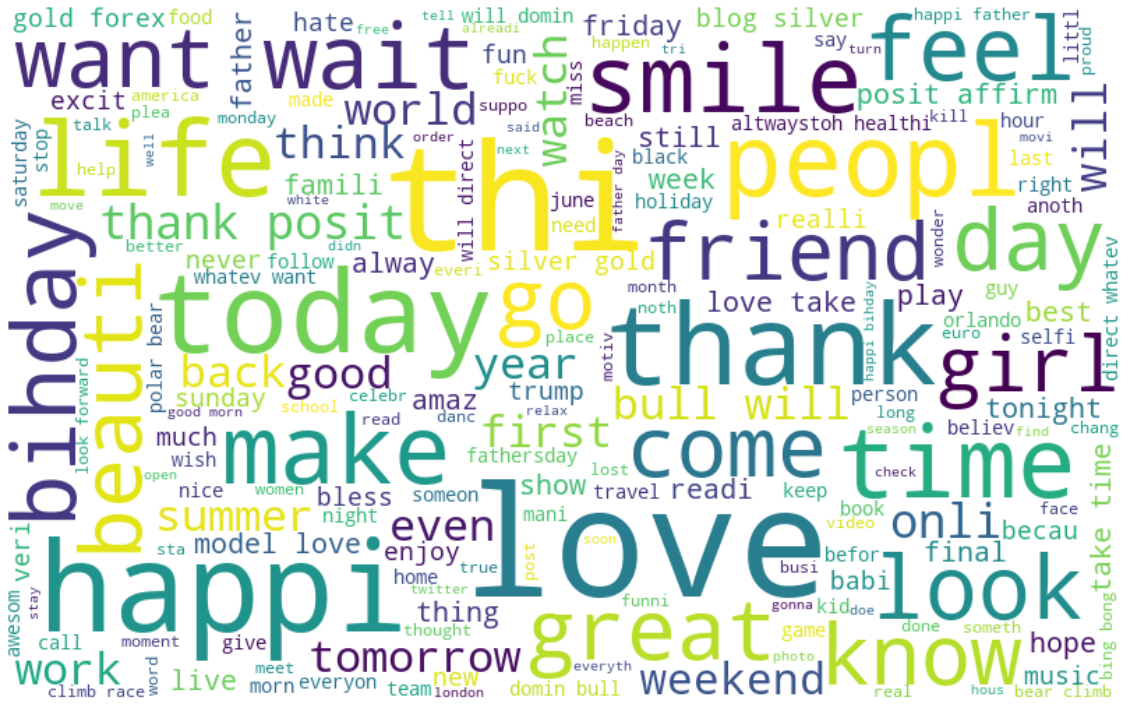

In [25]:
plt.figure(figsize = (20,19))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

from the above plot, we can see that words like **love, life,silver,thank, smile,affirm, friend** are most frequent words 

In [26]:
# # visualization  of all the words data entails with wordcloud plot
# totalWords = ' '.join([text for text in combination['Tidy_tweets']])
# from wordcloud import WordCloud 
# wordcloud = WordCloud(width = 800, height = 500, random_state = 21,background_color='white', max_font_size =110).generate(totalWords)

In [27]:
# plt.figure(figsize = (20,19))
# plt.imshow(wordcloud, interpolation= 'bilinear')
# plt.axis('off')
# plt.show()

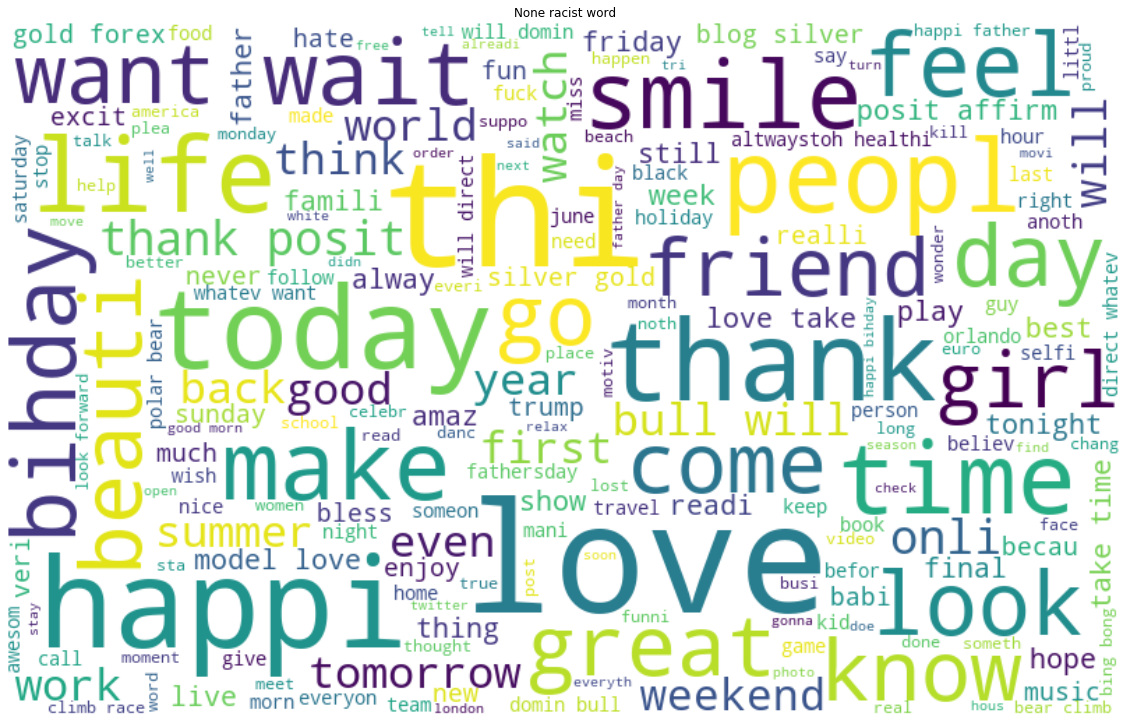

In [28]:
##none_racist_words = ' '.join([text for text in combination['Tidy_tweets'][combination['label'] == 0]])
none_racist_words = ' '.join(combination['Tidy_tweets'][combination['label'] == 0])
wordclloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(none_racist_words)
plt.figure(figsize = (20, 17))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('None racist word',)
plt.show()

the above visualization shows that the words does not contain racist content


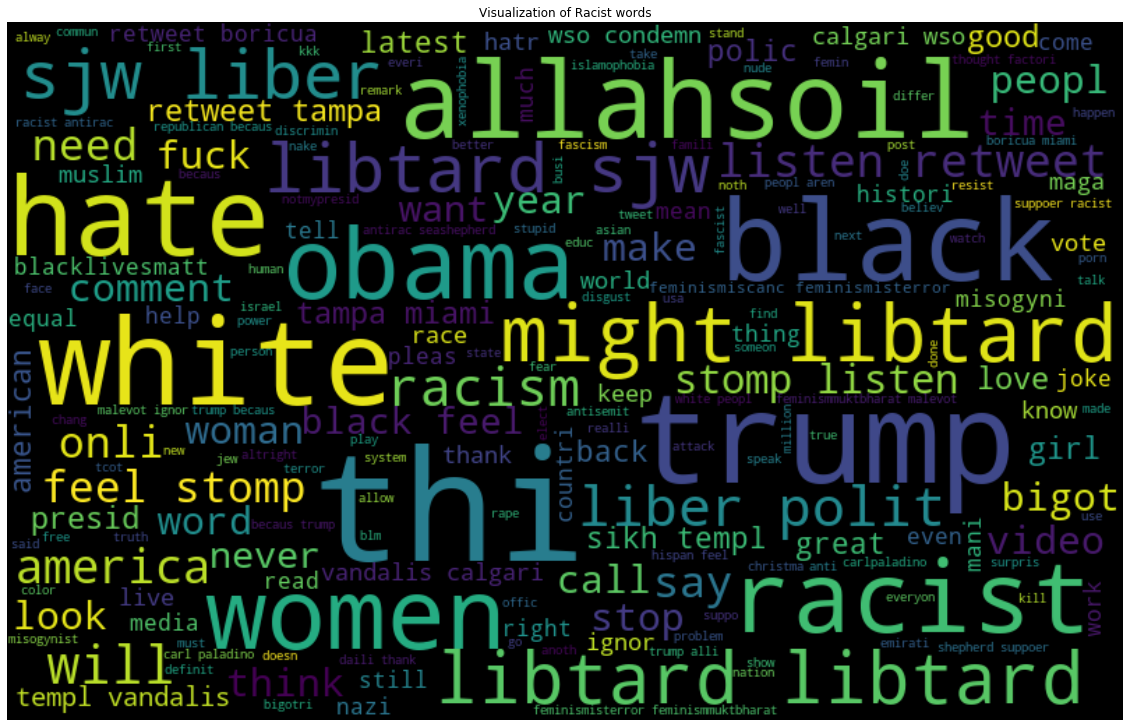

In [29]:
racist_words = ' '.join(combination['Tidy_tweets'][combination['label'] == 1])
wordcloud = WordCloud(width = 800, height = 500, random_state =21, max_font_size = 110).generate(racist_words)
plt.figure(figsize = (20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualization of Racist words')
plt.show()

In [30]:
combination

,id,label,tweet,Tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...


if you look closely in this plot you'd find negative words. 

# remember that twitter hashtags has to do with trends at a particular time  
i'm trying to check if this hashtags in anyway add value to this sentiment analysis.

In [31]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        hash_tag = re.findall(r"#(\w+)",i)
        hashtags.append(hash_tag)
    return hashtags
    
# extract hashtags from non racist/sexist tweets 
HashTag_regular = hashtag_extract(combination['Tidy_tweets'][combination['label'] == 0])

#extract hashtags from racist/sexiest tweets
HashTag_negative = hashtag_extract(combination['Tidy_tweets'][combination['label']==1])

#unnesting list 
HashTag_regular = sum(HashTag_regular,[]) 
HashTag_negative = sum(HashTag_negative,[])


# visulization of Non-Racist/Non-sexiest HashTag

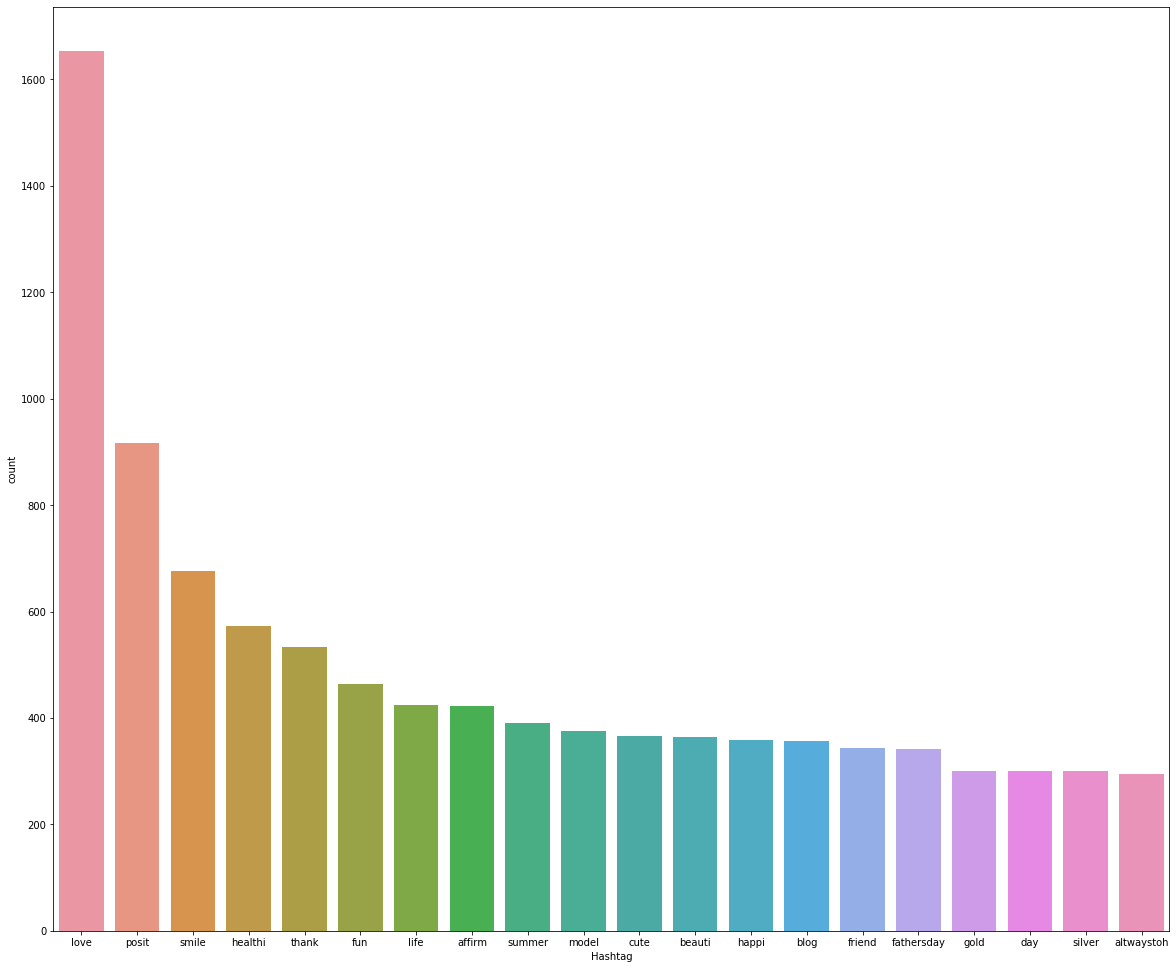

In [32]:
a = nltk.FreqDist(HashTag_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns = 'Count', n =20) # select top 20 most frequent hashtags
plt.figure(figsize= (20,17))
ax = sns.barplot(data = d, x = 'Hashtag', y = 'Count')
ax.set(ylabel = 'count')
plt.show()

# visulization of Racist/sexiest HashTag

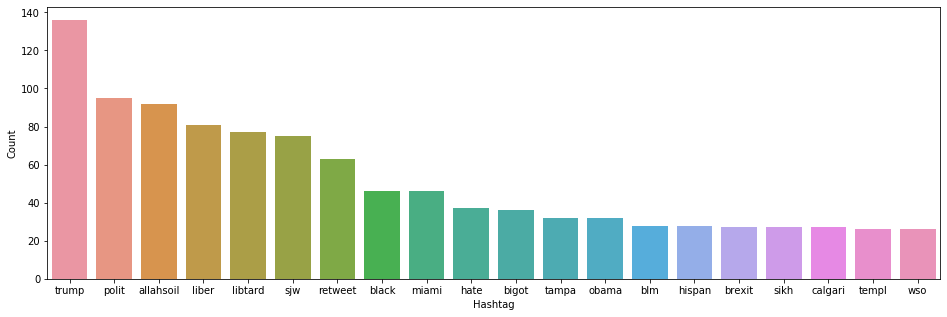

In [33]:
b = nltk.FreqDist(HashTag_negative)
e = pd.DataFrame({'Hashtag':list(b.keys()),
                  'Count':list(b.values())})
#selecting top 20 most frequent hashtags
e = e.nlargest(columns = 'Count',n = 20)
plt.figure(figsize = (16,5))
ax = sns.barplot(data = e, x = "Hashtag", y = 'Count')

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

# Bag of Words

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [35]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df = 2, max_features = 1000,
                                 stop_words = 'english')
bow = bow_vectorizer.fit_transform(combination['Tidy_tweets'])
bow.shape

(49159, 1000)

# TF-IDF features

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000,
                                  stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(combination['Tidy_tweets'])
tfidf.shape

(49159, 1000)

# Word2Vec Features

In [37]:
#### tokenized
tokenized_tweets = combination ['Tidy_tweets'].apply(lambda x : x.split())
Model_word2vec = gensim.models.Word2Vec(
                tokenized_tweets, size = 200, window = 5,
                min_count = 2, sg = 1,hs = 0,negative = 10,
                workers = 2,seed = 34)

In [38]:
Model_word2vec.train(tokenized_tweets, total_examples = len (combination['Tidy_tweets']),epochs = 20)

(6510306, 7536020)

to see how Word2Vec model performed, we specify a word and the model will pull out the most similar words from corpus

In [39]:
Model_word2vec.wv.most_similar(positive = 'dinner')

[('kayak', 0.5619074702262878),
 ('spaghetti', 0.5600332021713257),
 ('#cellar', 0.5572282075881958),
 ('cookout', 0.5515550374984741),
 ('#avocado', 0.5392987132072449),
 ('#biall', 0.5319873094558716),
 ('#tacotuesday', 0.5312159061431885),
 ('spinach', 0.5307434797286987),
 ('aladdin', 0.5307231545448303),
 ('reggio', 0.5274462103843689)]

In [40]:
Model_word2vec.wv.most_similar(positive = 'trump')

[('donald', 0.5460606217384338),
 ('melo', 0.5418007373809814),
 ('#delegaterevolt', 0.5386670827865601),
 ('tomlin', 0.5349830389022827),
 ('phoni', 0.5314830541610718),
 ('unfavor', 0.5281829833984375),
 ('unstabl', 0.5259896516799927),
 ('#mainstreammedia', 0.5223443508148193),
 ('businessman', 0.5210772752761841),
 ('nomine', 0.5208754539489746)]

In [41]:
Model_word2vec.wv.most_similar(positive= 'car')

[('airplan', 0.6172493100166321),
 ('toois', 0.5860790610313416),
 ('#roadsafeti', 0.5704355835914612),
 ('kennel', 0.518752932548523),
 ('lehman', 0.5173072814941406),
 ('firearm', 0.5127659440040588),
 ('repress', 0.5118321776390076),
 ('wynwood', 0.5114968419075012),
 ('regress', 0.511428952217102),
 ('swill', 0.5108204483985901)]

In [42]:
#check the  vector representation of any word from the corpus

Model_word2vec['food']


/home/tobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.00406368, -0.7753893 , -0.39334235,  0.5534605 ,  0.15288842,
        0.65329504,  0.41152102,  0.99645925,  0.6341667 ,  0.38689515,
       -0.02721465, -1.0137035 ,  0.00380626, -0.03178209, -0.5015788 ,
        0.30702674, -0.42641252, -0.658778  ,  0.21081135,  0.6073304 ,
       -0.03946713, -0.13751434,  0.71562463,  0.12234917,  0.14235698,
       -0.01117894, -0.08004966,  0.45573387, -0.41088548, -0.5275523 ,
       -0.63065547, -0.24890685,  0.19214857, -0.4251602 , -0.08522948,
        0.58614016,  0.19610457, -0.81664354,  0.16226685, -0.50407577,
       -0.1858666 , -1.1035292 ,  0.0390985 ,  0.31492952, -0.02867237,
        0.3373867 , -0.31471115,  0.16159403, -0.81428427, -0.3670329 ,
        0.99490416,  0.24218883, -0.58073694,  0.44233558,  0.5465429 ,
       -0.753698  ,  0.03708811,  0.5431557 , -0.6969491 ,  0.4615465 ,
        0.1763636 ,  0.19543159, -0.66659564, -0.7807929 ,  0.01116932,
        0.14863138,  0.08402291, -0.34146807, -0.44485876,  0.79

In [43]:
#PREPARING VECTORS FOR TWEETS

def wordVector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += Model_word2vec[word].reshape((1,size))
            count += 1
        except KeyError:
            if count != 0:
                vec /= count #equivalent
            return vec

In [50]:
# PREPARING WORD2VEC FEATURE SET....
wordVector_arrys = np.zeros((len(tokenized_tweets),200))
for i in range (len(tokenized_tweets)):
    wordVector_arrys[i,:] = wordVector(tokenized_tweets[i], 200)
    WordVector_DataFrame = pd.DataFrame(wordVector_arrys)
WordVector_DataFrame.shape

/home/tobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

In [54]:
# USING LOGISTIC REGRESSION MODEL 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962: ,:]
#spliting data into training and validation set xtrain_bow, xvalid_bow, ytrain, yval
x_train_bow, x_valid_bow,y_train, y_valid = train_test_split(train_bow, train_data['label'],
                                                        random_state = 42, test_size = 0.3)
Model_logReg = LogisticRegression()
Model_logReg.fit(x_train_bow, y_train)
prediction = Model_logReg.predict_proba(x_valid_bow)


/home/tobby/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
prediction

array([[9.99260394e-01, 7.39606000e-04],
       [9.88846928e-01, 1.11530723e-02],
       [9.84778874e-01, 1.52211261e-02],
       ...,
       [9.41147182e-01, 5.88528182e-02],
       [3.28650437e-01, 6.71349563e-01],
       [9.79000149e-01, 2.09998507e-02]])

In [69]:
prediction_int = prediction[:,1] >= 0.3

In [70]:
prediction_int.astype(np.int)

array([0, 0, 0, ..., 0, 1, 0])

In [72]:
f1_score(y_valid, prediction_int)

0.5307820299500832

In [75]:
test_pred = Model_logReg.predict_proba(test_bow)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id','label']]
submission.to_csv('logisticRegression_sentiment.csv', index = False)